In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ravishankarbhati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv("../Data/train_F3WbcTw.csv")

In [5]:
df.shape

(5279, 4)

In [6]:
df.columns

Index(['unique_hash', 'text', 'drug', 'sentiment'], dtype='object')

In [7]:
df.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [8]:
df.drop(columns="unique_hash",axis=1,inplace=True)

In [9]:
df.shape

(5279, 3)

In [10]:
df.columns

Index(['text', 'drug', 'sentiment'], dtype='object')

### makethe text to lowercase for all

In [11]:
df["text"] = df["text"].apply(lambda x:x.lower())

In [12]:
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [13]:
df.head()

,text,drug,sentiment
0,autoimmune diseases tend to come in clusters. ...,gilenya,2
1,i can completely understand why you’d want to ...,gilenya,2
2,interesting that it only targets s1p-1/5 recep...,fingolimod,2
3,"very interesting, grand merci. now i wonder wh...",ocrevus,2
4,"hi everybody, my latest mri results for brain ...",gilenya,1


###  get the list of stop words and lemmatize the words

In [14]:
stopwords = set(stopwords.words("english"))

In [15]:
len(stopwords)

179

In [16]:
#stopwords

In [17]:
word_lematizer = WordNetLemmatizer()

In [18]:
len(df[ df.sentiment == 0])

617

In [19]:
len(df[ df.sentiment == 1])

837

In [20]:
len(df[ df.sentiment == 2])

3825

In [21]:
len(df.drug.unique())

102

In [22]:
neutral_reviews = df[ df.sentiment == 2].sample(n=617)

In [23]:
neutral_reviews.head()

,text,drug,sentiment
1323,"contradictory? fingolimod, an oral compound us...",fingolimod,2
3300,i think the medication that they mentioned tha...,stelara,2
1667,"hi all, this is my first post so i’m kinda int...",mavenclad,2
1737,"also, stelara is on bcbs formulary at least. a...",stelara,2
3180,1. the response rates to standard chemotherapy...,alectinib,2


In [24]:
len(neutral_reviews["drug"].value_counts())

60

In [25]:
len(df["drug"].unique())

102

In [26]:
len(df[df.sentiment == 0]["drug"].value_counts())

57

In [27]:
len(df[df.sentiment == 1]["drug"].value_counts())

54

In [28]:
len(df[df.sentiment == 2]["drug"].value_counts())

97

In [29]:
df.columns

Index(['text', 'drug', 'sentiment'], dtype='object')

In [30]:
neutral_rev= pd.DataFrame(columns=['text', 'drug', 'sentiment'])

In [31]:
neutral_rev

,text,drug,sentiment


In [32]:
for dg in df.drug.unique() :
    neu_review = df[ (df['sentiment']==2) & (df['drug']== dg)]
    if(len(neu_review))>20 :
        neu_sample = neu_review.sample(n=20)
    else :
        neu_sample = neu_review
    #print(neu_sample)
    neutral_rev = neutral_rev.append(neu_sample)
    #print(neutral_rev)

In [33]:
neutral_rev.shape

(977, 3)

In [34]:
( (neutral_rev.drug.value_counts() >=6)).value_counts()

True     52
False    45
Name: drug, dtype: int64

In [35]:
#df.drug.value_counts().sort_values(ascending=False)

In [36]:
drug_value_counts = df.drug.value_counts().tolist()

In [37]:
np.median(drug_value_counts)

7.0

In [38]:
np.std(drug_value_counts)

116.44483977946336

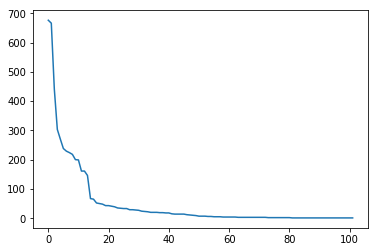

In [39]:
plt.plot(drug_value_counts)

In [40]:
np.percentile(drug_value_counts,75)

33.0

In [41]:
drug_value_more = ( ( df.drug.value_counts() > int(np.percentile(drug_value_counts,75)) )==True ).keys().tolist()

In [42]:
neutral_rev.shape

(977, 3)

In [43]:
pos_rev = df[ df.sentiment==0 ]
pos_rev.shape

(617, 3)

In [44]:
neg_rev= df[ df.sentiment==1]
neg_rev.shape

(837, 3)

In [45]:
neutral_rev.head(2)

,text,drug,sentiment
5250,thanks everyone you have made me feel alot bet...,gilenya,2
2599,@fxms do you know much about the process of go...,gilenya,2


In [46]:
neu_rev= neutral_rev

In [47]:
pos_rev.head(2)

,text,drug,sentiment
6,reply posted for jesszidek. hi jess sorry to r...,humira,0
28,"last updated: january 01, 2017. share | comme...",ocrelizumab,0


In [48]:
neg_rev.head(2)

,text,drug,sentiment
4,"hi everybody, my latest mri results for brain ...",gilenya,1
8,why do you think that fingolimod was such a mi...,fingolimod,1


##  data pre processing done

## taking the test data given an dformatting it to run the model on it 

In [49]:
from string import punctuation
import re

In [50]:
def hasPunctuations(inputString):
    return any(char for char in inputString if(char not in punctuation))

In [51]:
def GetTokens(text):
    tokens = nltk.tokenize.word_tokenize(text)
    
    #tokens = [t for t in tokens if (hasPunctuations(t)==False) ]
    
    temp_tokens = tokens
    for token in temp_tokens :
        if (re.match(r'\w',token)):
            tokens.remove(token)
            token = re.sub(r'[0-9]',"",token)
            tokens.append(token)
        elif (re.match(r'\W',token)):
            tokens.remove(token)
            token = re.sub(r'\W',"",token)
            token = re.sub(r'[0-9]',"",token)
            if(len(token.strip())> 2 and len(token.strip()) < 20):
                if( ( token.find("www")== -1 and token.find("html")== -1 and token.find("http")== -1 and token.find("blog")==-1 and token.find("youtube")==-1 
                     and token.find("org")==-1) ):
                    tokens.append(token)
    
    for token in tokens:
        if(token.strip() in appos.keys()):
            token = appos[token.strip()]
            
    
    #tokens = [appos[t.strip()] for t in tokens if(t.strip() in appos.keys())]
    #print(tokens)

    tokens = [re.sub(r'[-][-]+',"",t) for t in tokens]
    tokens = [re.sub(r'[0-9]+.[0-9]+',"",t) for t in tokens]
    tokens = [re.sub(r'[\.]',"",t) for t in tokens]
    tokens = [ word_lematizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if (len(t.strip())>2)]
    tokens = [t for t in tokens if (len(t.strip())<15)]
    tokens = [t for t in tokens if t not in stopwords]
    
    
    return tokens

In [52]:
current_index=0
pos_tokens = []
neg_tokens = []
neu_tokens = []
word_index_map = {}

pos_tokenized = []
neg_tokenized = []
neu_tokenized = []

for review in pos_rev.text :
    tokens = GetTokens(review)
    #print(tokens)
    pos_tokenized.append(tokens)
    for token in tokens:
        if(token not in word_index_map) :
            word_index_map[token]=current_index
            current_index += 1

for review in neg_rev.text :
    tokens = GetTokens(review)
    neg_tokenized.append(tokens)
    for token in tokens:
        if(token not in word_index_map) :
            word_index_map[token]=current_index
            current_index += 1

for review in neu_rev.text :
    tokens = GetTokens(review)
    neu_tokenized.append(tokens)
    for token in tokens:
        if(token not in word_index_map) :
            word_index_map[token]=current_index
            current_index += 1

In [53]:
len(word_index_map)

28041

In [54]:
#datatest = np.zeros( ( len(pos_tokenized)+len(neg_tokenized)+len(neu_tokenized), len(word_index_map)) )

In [55]:
#len(word_index_map)

In [56]:
data = np.zeros( ( len(pos_tokenized)+len(neg_tokenized)+len(neu_tokenized), len(word_index_map)+1 ) )

In [57]:
data.shape

(2431, 28042)

In [58]:
def TokenToVectors(tokens,label) :
    x= np.zeros(len(word_index_map) +1)
    
    for token in tokens:
        if(token in word_index_map.keys()):
            index = word_index_map[token]
            x[index] +=1
    
    x = x/x.sum()
    x[-1]=label
    
    return x

i =0

for tokens in pos_tokenized :
    x_row = TokenToVectors(tokens,0)
    data[i,:]= x_row
    i += 1

for tokens in neg_tokenized :
    x_row = TokenToVectors(tokens,1)
    data[i,:]= x_row
    i += 1

for tokens in neu_tokenized :
    x_row = TokenToVectors(tokens,2)
    data[i,:]= x_row
    i += 1

In [59]:
data.shape

(2431, 28042)

In [ ]:
df = pd.DataFrame(data[:,:-1],columns=word_index_map)

df_cols= {}

for col in df.columns:
    df_cols[col]=df[col].sum()

custom_tokens = {}
index =0

for word_count in (sorted(df_cols.items(), key=lambda x: x[1])[-int(len(df.columns)/2):]):
    custom_tokens[word_count[0]]=index
    index += 1
    #print(word_count)

In [ ]:
word_index_map = custom_tokens

In [60]:
len(word_index_map)

28041

In [61]:
#word_index_map

In [62]:
data = np.zeros( ( len(pos_tokenized)+len(neg_tokenized)+len(neu_tokenized), len(word_index_map)+1 ) )

i =0

for tokens in pos_tokenized :
    x_row = TokenToVectors(tokens,0)
    data[i,:]= x_row
    i += 1

for tokens in neg_tokenized :
    x_row = TokenToVectors(tokens,1)
    data[i,:]= x_row
    i += 1

for tokens in neu_tokenized :
    x_row = TokenToVectors(tokens,2)
    data[i,:]= x_row
    i += 1

In [63]:
data.shape

(2431, 28042)

### split the data and create models

In [64]:
np.random.shuffle(data)

total_len=int(len(data) * 0.8)

In [65]:
X = data[: , :-1]
Y = data[:,-1]

X_train = X[0:total_len , :]
Y_train = Y[0:total_len]

X_test = X[total_len : , :]
Y_test = Y[total_len:]

In [66]:
#from sklearn.linear_model import LogisticRegression
#logis_model = LogisticRegression()
#logis_model.fit(X,Y)
#logis_model.score(X,Y)

In [67]:
#from sklearn.ensemble import RandomForestClassifier
#randomforest_model = RandomForestClassifier(n_estimators=10)
#randomforest_model.fit(X,Y)
#randomforest_model.score(X,Y)

In [68]:
import lightgbm as lgb

In [70]:
lgb_train = lgb.Dataset(X,Y)
#lgb_eval = lgb.Dataset(, Y, reference=lgb_train)
params = {}
params['learning_rate'] = 0.01
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['num_class'] = 3
params['metric'] = 'multi_logloss'
params['sub_feature'] = 0.6
params['num_leaves'] = 40
#params['max_depth'] = 100
params['bagging_fraction'] = 0.6
params['bagging_freq'] = 3

#lgb_model = lgb.train(params,lgb_train,num_boost_round=1000)
lgb_cv = lgb.cv(params, lgb_train, num_boost_round=2000, nfold=5, stratified=True, verbose_eval=20, early_stopping_rounds=100)

nround = lgb_cv['multi_logloss-mean'].index(np.min(lgb_cv['multi_logloss-mean']))
print(nround)

#model = lgb.train(params, lgb_train, num_boost_round=1000)

[20]	cv_agg's multi_logloss: 1.04083 + 0.00203509
[40]	cv_agg's multi_logloss: 1.00992 + 0.00464631
[60]	cv_agg's multi_logloss: 0.983375 + 0.00584144
[80]	cv_agg's multi_logloss: 0.961768 + 0.00776434
[100]	cv_agg's multi_logloss: 0.943973 + 0.00855624
[120]	cv_agg's multi_logloss: 0.928992 + 0.0092494
[140]	cv_agg's multi_logloss: 0.915496 + 0.0101297
[160]	cv_agg's multi_logloss: 0.904008 + 0.0107604
[180]	cv_agg's multi_logloss: 0.895059 + 0.0118156
[200]	cv_agg's multi_logloss: 0.886954 + 0.0120388
[220]	cv_agg's multi_logloss: 0.880507 + 0.0127092
[240]	cv_agg's multi_logloss: 0.875268 + 0.0133704
[260]	cv_agg's multi_logloss: 0.870722 + 0.0136642
[280]	cv_agg's multi_logloss: 0.866401 + 0.0138241
[300]	cv_agg's multi_logloss: 0.863377 + 0.0146668
[320]	cv_agg's multi_logloss: 0.860241 + 0.0148122
[340]	cv_agg's multi_logloss: 0.858023 + 0.0152271
[360]	cv_agg's multi_logloss: 0.856474 + 0.0158033
[380]	cv_agg's multi_logloss: 0.854385 + 0.0159142
[400]	cv_agg's multi_logloss: 0.

In [72]:
model = lgb.train(params, lgb_train, num_boost_round=520)

## import the test data and run the model on it

In [73]:
testdata= pd.read_csv("../Data/test_tOlRoBf.csv")

In [74]:
testdata.head()

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara


In [75]:
testdata["text"] = testdata["text"].apply(lambda x:x.lower())

In [76]:
testdata.shape

(2924, 3)

In [77]:
#samplesubmission = pd.read_csv("../Data/sample_submission_i5xnIZD.csv")

In [78]:
#samplesubmission.head()

In [79]:
current_index=0
pos_tokens = []
neg_tokens = []
neu_tokens = []
word_index_map_test = {}

review_tokenized = []

for review in testdata.text :
    tokens = GetTokens(review)
    
    for token in tokens:
        if(token not in word_index_map) :
            tokens.remove(token)
    
    review_tokenized.append(tokens)
    

In [80]:
datatest = np.zeros( ( len(review_tokenized), len(word_index_map)) )

In [81]:
datatest.shape

(2924, 28041)

In [82]:
def TokenToVectorsTest(tokens) :
    x= np.zeros(len(word_index_map))
    
    for token in tokens:
        if(token in word_index_map):
            index = word_index_map[token]
            x[index] +=1
    
    x = x/x.sum()
    #x[-1]=label
    
    return x

In [83]:
i =0

for tokens in review_tokenized :
    #print(tokens)
    x_row = TokenToVectorsTest(tokens)
    datatest[i,:]= x_row
    i += 1


In [84]:
#ypreds = randomforest_model.predict(datatest)

In [85]:
ypreds1 = model.predict(datatest)

In [86]:
ypreds = []

for x in ypreds1:
    ypreds.append(np.argmax(x))

In [87]:
from sklearn.metrics import f1_score

In [88]:
len(ypreds)

2924

In [89]:
testdata["sentiment"] = [ y for y in ypreds]

In [90]:
testdata.head()

,unique_hash,text,drug,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,on fingolimod and have been since december 201...,fingolimod,1
2,50b6d851bcff4f35afe354937949e9948975adf7,apparently it's shingles! :-/ i do have a few ...,humira,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,if the docetaxel doing once a week x3 weeks th...,tagrisso,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"cc, stelara worked in a matter of days for me....",stelara,2


In [91]:
final_submission_file = testdata[["unique_hash","sentiment"]]

In [92]:
final_submission_file.shape

(2924, 2)

In [93]:
final_submission_file.to_csv("submission.csv",index=False)

# <red><b><h2> try removing urls, creating category for integers/numbers</h2></b></red>

In [ ]:
df = pd.DataFrame(data[:,:-1],columns=word_index_map)

df_cols= {}

for col in df.columns:
    df_cols[col]=df[col].sum()

custom_tokens = {}
index =0

for word_count in (sorted(df_cols.items(), key=lambda x: x[1])[-int(len(df.columns)/2):]):
    custom_tokens[word_count[0]]=index
    index += 1
    #print(word_count)

In [ ]:
custom_tokens

In [ ]:
import re

In [ ]:
temp_data = pd.DataFrame(data[ : , :-1], columns=word_index_map)

In [ ]:
print(temp_data.columns)

In [ ]:
toks = word_index_map.keys()

w_tokens= []

count=0
for tok in toks:
    if (re.match(r'\w',tok)):
        #tok = re.sub(r'[0-9]',"",tok)
        #print(tok)
        w_tokens.append(tok)
        count +=1

print(count)

not_w_tokens= []

count=0
for tok in toks:
    if (re.match(r'\W',tok)):
        #tok = re.sub(r'[0-9]',"",tok)
        #print(tok)
        not_w_tokens.append(tok)
        count +=1

print(count)

temp_w_tokens = []

count=0
for tok in w_tokens:
    if (re.match(r'\w',tok)):
        actualtok = tok
        tok = re.sub(r'[0-9]',"",tok)
        #print(tok)
        
        if(len(tok.strip())> 2):
            temp_w_tokens.append(tok)
            
        count +=1

print(count)

#len(temp_w_tokens)

temp_not_w_tokens = []

count=0
for tok in not_w_tokens:
    tok = re.sub(r'\W',"",tok)
    tok = re.sub(r'[0-9]',"",tok)
    #print(tok)
    
    if(len(tok.strip())> 2 and len(tok.strip()) < 20):
        if( ( tok.find("www")== -1 and tok.find("html")== -1 and 
            tok.find("blog")==-1 and tok.find("youtube")==-1 
            and tok.find("org")==-1) ):
            temp_not_w_tokens.append(tok)
    count +=1

print(count)

In [ ]:
len(temp_not_w_tokens)

In [ ]:
#temp_not_w_tokens

In [ ]:
text_pre_tokens=temp_w_tokens + temp_not_w_tokens

In [ ]:
len(text_pre_tokens)

In [ ]:
31843 + 905

In [ ]:
count=0
for tok in toks:
    #re.sub(r'[0123456789:-.,]',"",tok)
    #re.sub(r"\W", "", tok, flags=re.I)
    tok.replace('percent',"")
    if (re.match(r'\W',tok)):
        tok = re.sub(r'\W',"",tok)
        tok = re.sub(r'[0-9]',"",tok)
        print(tok)
        tokens_new.append(tok)
        count +=1

print(count)

In [ ]:
tokens_new

In [ ]:
count=0
for tok in toks:
    if (re.match(r'\W',tok)):
        print(tok)
        count +=1

print(count)

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [ ]:
nltk.pos_tag("Ravi is awesome. accumulation-presence He is going to Jail. ≤0.03 .375 // //multiple-sclerosis-research.blogspot.com/2015/09/clinicspeak-is-r".split())